## Dependencies

### Library Installation (if needed)

In [1]:
#! pip install -qUr requirements.txt

In [2]:
import pandas as pd
import yfinance as yf
from methods.screener_methods import *
from tqdm import tqdm

### Single import

HVID.CO


,Ticker,Name,Earnings,Signal,Final Score,Value Score,Momentum Score,Leadership Score,P/E Score,ROA Score,...,ROA%,EPS,P/B,D/E,Insider Buy%,50d Average Change%,Sector,Industry,Country,Owned
0,HVID.CO,Hvidbjerg Bank A/S,NaN,Hold,0.17,0.12,0.05,0.1,0.73,-0.79,...,1.35,96.76,1.24,NaN,0.0,0.06,Financial Services,Banks - Regional,Denmark,False


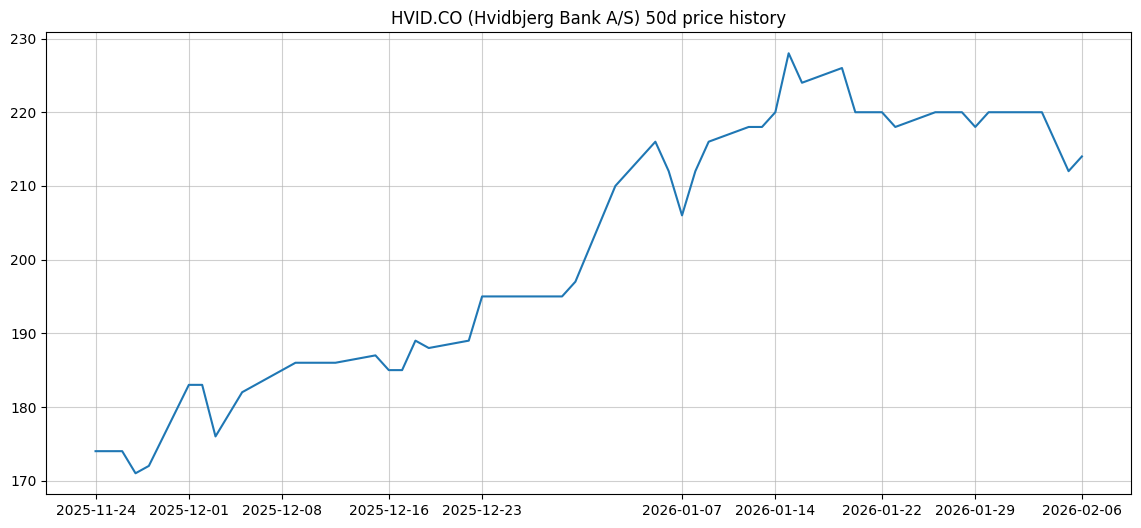

50d Average Change%: 0.06


In [3]:
symbol = "HVID.CO"
stock = Stock(symbol)
print(stock.symbol)
display(stock.summary())
stock.price_graph("50d")
print(f"50d Average Change%: {round(stock.momentum, 2)}")

### Screener

In [4]:
symbol_list = "simple" #"simple", "danish", "filtered", "all"

if symbol_list == "all":
    symbols = (
        pd.read_csv("../data/tickers/tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].to_list()
    )
elif symbol_list == "filtered":
    symbols = pd.read_csv("../data/tickers/screener_filtered_tickers.csv")["Ticker"].tolist()
elif symbol_list == "danish":
    symbols = pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist()
else:
    symbols = pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].tolist()
symbols = list(set(symbols))

In [5]:
import sys, io
df = pd.DataFrame()
for symbol in tqdm(symbols, smoothing=0):
    old_stderr = sys.stderr
    sys.stderr = io.StringIO()
    try:
        df = pd.concat([df, Stock(symbol).summary()])
    except Exception:
        pass
    finally:
        sys.stderr = old_stderr
df = df.sort_values(by="Final Score", ascending=False)
display(df)
if symbol_list == "simple":
    df.to_csv("../data/screener_results/simple_screener_results.csv", index=False)
elif symbol_list == "danish":
    df.to_csv("../data/screener_results/danish_screener_results.csv", index=False)
elif symbol_list == "filtered" or symbol_list == "all":   
    df.to_csv("../data/screener_results/screener_results.csv", index=False)
    df["Ticker"].to_csv("../data/tickers/screener_filtered_tickers.csv", index=False)

100%|██████████| 83/83 [01:08<00:00,  1.21it/s]


,Ticker,Name,Earnings,Signal,Final Score,Value Score,Momentum Score,Leadership Score,P/E Score,ROA Score,...,ROA%,EPS,P/B,D/E,Insider Buy%,50d Average Change%,Sector,Industry,Country,Owned
0,TRMD,TORM plc,26-02-2026,Buy,3.08,1.77,1.31,0.16,0.86,0.58,...,5.99,2.73,1.10,0.42,0.0,0.12,Energy,Oil & Gas Midstream,United Kingdom,True
0,BAVA.CO,Bavarian Nordic A/S,14-11-2025,Buy,2.49,2.38,0.11,0.36,0.95,0.83,...,7.78,30.70,1.15,0.01,0.0,0.01,Healthcare,Biotechnology,Denmark,False
0,MTHH.CO,MT Højgaard Holding A/S,20-02-2026,Buy,2.37,1.59,0.77,0.20,0.70,0.71,...,6.62,44.91,3.52,0.20,0.0,0.07,Industrials,Engineering & Construction,Denmark,True
0,STG.CO,Scandinavian Tobacco Group A/S,04-03-2026,Buy,2.10,1.45,0.65,0.22,0.75,0.40,...,5.37,9.20,0.94,0.65,0.0,0.06,Consumer Defensive,Tobacco,Denmark,True
0,SPG.CO,SP Group A/S,18-11-2025,Buy,1.35,0.82,0.53,0.08,0.06,0.77,...,7.13,20.10,2.52,0.59,0.0,0.10,Basic Materials,Specialty Chemicals,Denmark,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,GN.CO,GN Store Nord A/S,05-02-2026,Sell,-1.11,-0.63,-0.48,0.01,-0.28,-0.30,...,3.56,4.48,1.27,0.99,0.0,-0.12,Healthcare,Medical Devices,Denmark,False
0,HIMS,"Hims & Hers Health, Inc.",23-02-2026,Sell,-1.46,-0.74,-0.73,-0.00,-1.09,0.46,...,5.54,0.53,9.19,1.92,39.3,-0.31,Healthcare,Drug Manufacturers - Specialty & Generic,United States,False
0,VWS.CO,Vestas Wind Systems A/S,05-02-2026,Sell,-1.83,-1.61,-0.22,0.16,-0.92,-0.59,...,2.65,5.75,5.95,0.87,0.0,-0.02,Industrials,Specialty Industrial Machinery,Denmark,False
0,HARB-B.CO,Harboes Bryggeri B A/S,NaN,Sell,-2.46,-1.57,-0.89,0.03,-1.10,-0.75,...,1.70,2.03,0.60,0.23,0.0,-0.08,Consumer Defensive,Beverages - Brewers,Denmark,False
